## Additional

아래에서는 추가적인 분석을 시도하였다. 내용은 아래와 같다. 

+ **Simpson's Paradox** : 전체 데이터를 고려했을 때와 개별 데이터를 고려했을 때의 관계 역전 현상

+ Hazard : 전체/피험자별 hazard를 도출하고 왜 **200ms** 부근의 특이적 peak가 관찰되는 현상에 대한 설명

+ empirical CDF vs. Survival Plot

+ Cox PH vs. AFT comparison

### Simpson's Paradox

### Hazard

그림이 이상한 피험자가 왜 이리 많지?

![](../EyeTracking_data/Figures/Hazards.png)

### emp CDF vs. Survival Plot

In [32]:
import numpy as np
from scipy.optimize import minimize

import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
a = 1
b = 3
c = np.array([1,2,3])
d = np.array([5,6,7])

a**3

1

In [16]:
def WeibLogLike(params, x, delta) :
    alpha = params[0]
    lamb  = params[1]
    res = np.sum(delta) * np.log(alpha * lamb) \
    + (alpha - 1) * np.sum(delta * np.log(x)) \
    - lamb * np.sum(x**alpha)
    return(res)

In [17]:
WeibLogLike((a,b),c,d)

1.7750211960259747

In [21]:
minimize(WeibLogLike, np.array([1,1]), args=(c,d), method = 'L-BFGS-B')

/Users/hyunwoogu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


      fun: nan
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  6.8222537 , -16.73417138])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 129
      nit: 1
   status: 2
  success: False
        x: array([-3.51320939, -1.15196213])

In [22]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.special import beta

class sgt(st.rv_continuous):

    def _pdf(self, x, mu, sigma, lam, p, q):

        v = q ** (-1 / p) * \
            ((3 * lam ** 2 + 1) * (
                    beta(3 / p, q - 2 / p) / beta(1 / p, q)) - 4 * lam ** 2 *
             (beta(2 / p, q - 1 / p) / beta(1 / p, q)) ** 2) ** (-1 / 2)

        m = 2 * v * sigma * lam * q ** (1 / p) * beta(2 / p, q - 1 / p) / beta(
            1 / p, q)

        fx = p / (2 * v * sigma * q ** (1 / p) * beta(1 / p, q) * (
                abs(x - mu + m) ** p / (q * (v * sigma) ** p) * (
                lam * np.sign(x - mu + m) + 1) ** p + 1) ** (
                          1 / p + q))

        return fx

    def _argcheck(self, mu, sigma, lam, p, q):

        s = sigma > 0
        l = -1 < lam < 1
        p_bool = p > 0
        q_bool = q > 0

        all_bool = s & l & p_bool & q_bool

        return all_bool

In [54]:
st

<module 'scipy.stats' from '/Users/hyunwoogu/anaconda3/lib/python3.6/site-packages/scipy/stats/__init__.py'>

In [24]:
sgt_inst = sgt(name='sgt')
vars = sgt_inst.rvs(mu=1, sigma=3, lam = -0.1, p = 2, q = 50, size = 100)


In [25]:
vars

array([-1.43898496,  2.17986728,  1.56202952,  5.11641782, -3.84525169,
        0.07888252, -2.0507544 ,  0.92650156, -2.66255378,  3.10878635,
        3.21831459, -1.93631658,  4.72819794,  1.94442741, -0.27987297,
        2.02933469,  4.73328828,  4.95703791,  2.96410507,  1.61171163,
        3.70028768,  4.68871795,  6.27234508,  7.27353161, -0.4139912 ,
        1.07750586,  3.67280391, -0.83271724, -1.70204096,  4.04177989,
        7.36820542,  6.83149347,  2.02761417,  2.98680072, -0.58041508,
        0.8420581 ,  0.19312354,  3.91835597,  2.30646154,  1.66241664,
        1.73184915, -0.34707955, -1.75462504,  6.05233745,  2.63104461,
        4.86396067, -0.36612478,  1.54099333,  7.4487284 ,  0.10778111,
       -1.22234091, -0.94645705,  6.0391678 , -0.06975953,  2.24937686,
       -1.22003506,  2.01385181,  2.24718329, -2.25957227,  5.75948104,
        7.61030296,  4.74115927, -3.29607202,  4.30996681, -3.65818351,
        0.75852985, -0.37722094,  4.15735056,  1.73398379,  8.79

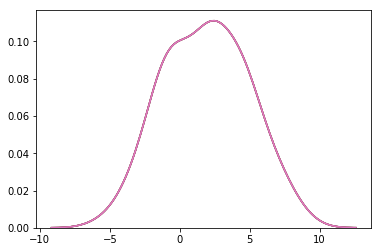

In [35]:
sns.kdeplot(vars)
plt.show()

In [36]:
sgt_inst._fitstart(vars)

(1.0, 1.0, 1.0, 1.0, 1.0, 0, 1)

In [56]:
Samples = Weib_inst.rvs(alpha=1, lam=3, size = 1000)


TypeError: 'float' object is not subscriptable

In [49]:
class Weib(st.rv_continuous):

    def _pdf(self, data, alpha, lam):
        t = data[0]
        delta = data[1]
        fx = (alpha * lam * (t**(alpha-1)))**(delta) * np.exp(-lam * (t**alpha))
        return fx

    def _argcheck(self, alpha, lam):
        a = alpha > 0
        l = lam > 0 
        all_bool = a & l
        return all_bool

In [50]:
Weib_inst = Weib(name='Weib')

In [53]:
Weib_inst._fitstart([[1,2],[2,4]])

TypeError: 'float' object is not subscriptable

In [42]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.special import beta

class sgt(st.rv_continuous):

    def _pdf(self, x, mu, sigma, lam, p, q):

        v = q ** (-1 / p) * \
            ((3 * lam ** 2 + 1) * (
                    beta(3 / p, q - 2 / p) / beta(1 / p, q)) - 4 * lam ** 2 *
             (beta(2 / p, q - 1 / p) / beta(1 / p, q)) ** 2) ** (-1 / 2)

        m = 2 * v * sigma * lam * q ** (1 / p) * beta(2 / p, q - 1 / p) / beta(
            1 / p, q)

        fx = p / (2 * v * sigma * q ** (1 / p) * beta(1 / p, q) * (
                abs(x - mu + m) ** p / (q * (v * sigma) ** p) * (
                lam * np.sign(x - mu + m) + 1) ** p + 1) ** (
                          1 / p + q))

        return fx

    def _argcheck(self, mu, sigma, lam, p, q):

        s = sigma > 0
        l = -1 < lam < 1
        p_bool = p > 0
        q_bool = q > 0

        all_bool = s & l & p_bool & q_bool

        return all_bool

In [37]:
sgt_inst.fit(vars, 0.5, 0.5, -0.5, 2, 10)


/Users/hyunwoogu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars


(0.3507231473642418,
 5.204952277675636,
 -0.21739390891617938,
 4.283639648810803,
 1.5979066794695522,
 0.014343844445173136,
 0.5437554090731822)